In [1]:
!pip install missingno
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
!pip install firebase-admin
import firebase_admin
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Konfigurasi database tujuan
dest_cred = credentials.Certificate("/work/staklimjerukagung-firebase-admin.json")
dest_app = firebase_admin.initialize_app(dest_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [3]:
# Referensi ke data sumber
source_ref = db.reference('/auto_weather_stat/id-03/data')

# Mengambil data dari database sumber
source_data = source_ref.get()

# Mengubah data menjadi DataFrame pandas
if source_data:
    # Mengubah data menjadi DataFrame
    cuacaT = pd.DataFrame.from_dict(source_data, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuacaT.columns:
        cuacaT.index.name = 'timestamp'  # Mengatur nama indeks
        cuacaT.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print(cuacaT.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data di jalur /auto_weather_stat/id-03/data.")

              dew humidity pressure temperature   timestamp  volt
0           26.71    73.76  1006.15       31.98           0  4.14
1702296831  23.29    89.28  1010.72       25.18  1702296831  4.08
1702296891  23.29    89.38  1010.75       25.16  1702296891  4.08
1702296951  23.31    89.58  1010.76       25.14  1702296951  4.08
1702297011  23.35    89.86  1010.82       25.13  1702297011  4.08


In [4]:
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1735995225,25.21129,97.6,1011.07,25.62,1735995225,4.08
1735995285,25.24464,97.62,1011.1,25.65,1735995285,4.07
1735995345,25.23675,97.69,1011.05,25.63,1735995345,4.08
1735995405,25.23159,97.66,1011.08,25.63,1735995405,4.07
1735995465,25.24156,97.66,1011.11,25.64,1735995465,4.08
1735995525,25.22334,97.67,1011.11,25.62,1735995525,4.07
1735995585,25.23847,97.7,1011.09,25.63,1735995585,4.08
1735995645,25.21165,97.66,1011.12,25.61,1735995645,4.07
1735995705,25.22712,97.75,1011.14,25.61,1735995705,4.07
1735995766,25.26563,97.8,1011.09,25.64,1735995766,4.07


In [5]:
cuacaT.describe()

,dew,humidity,pressure,temperature,timestamp,volt
count,552024,552024,552024,552024,552024,552024
unique,47116,8789,2406,3292,552024,39
top,25.37,100,1011.63,26.03,1735995766,4.12
freq,1628,9303,1132,1073,1,67147


In [6]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1735995225,25.21129,97.6,1011.07,25.62,1735995225,4.08
1735995285,25.24464,97.62,1011.1,25.65,1735995285,4.07
1735995345,25.23675,97.69,1011.05,25.63,1735995345,4.08
1735995405,25.23159,97.66,1011.08,25.63,1735995405,4.07
1735995465,25.24156,97.66,1011.11,25.64,1735995465,4.08
1735995525,25.22334,97.67,1011.11,25.62,1735995525,4.07
1735995585,25.23847,97.7,1011.09,25.63,1735995585,4.08
1735995645,25.21165,97.66,1011.12,25.61,1735995645,4.07
1735995705,25.22712,97.75,1011.14,25.61,1735995705,4.07
1735995766,25.26563,97.8,1011.09,25.64,1735995766,4.07


In [7]:
# Menampilkan 10 data terakhir
cuacaT.head(10)

,dew,humidity,pressure,temperature,timestamp,volt
0,26.71,73.76,1006.15,31.98,0,4.14
1702296831,23.29,89.28,1010.72,25.18,1702296831,4.08
1702296891,23.29,89.38,1010.75,25.16,1702296891,4.08
1702296951,23.31,89.58,1010.76,25.14,1702296951,4.08
1702297011,23.35,89.86,1010.82,25.13,1702297011,4.08
1702297071,23.32,89.85,1010.82,25.10,1702297071,4.08
1702297131,23.29,89.81,1010.85,25.08,1702297131,4.08
1702297190,23.27,89.87,1010.84,25.05,1702297190,4.08
1702297251,23.26,89.88,1010.88,25.04,1702297251,4.09
1702297311,23.26,90.00,1010.86,25.02,1702297311,4.08


In [8]:
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1735995225,25.21129,97.6,1011.07,25.62,1735995225,4.08
1735995285,25.24464,97.62,1011.1,25.65,1735995285,4.07
1735995345,25.23675,97.69,1011.05,25.63,1735995345,4.08
1735995405,25.23159,97.66,1011.08,25.63,1735995405,4.07
1735995465,25.24156,97.66,1011.11,25.64,1735995465,4.08
1735995525,25.22334,97.67,1011.11,25.62,1735995525,4.07
1735995585,25.23847,97.7,1011.09,25.63,1735995585,4.08
1735995645,25.21165,97.66,1011.12,25.61,1735995645,4.07
1735995705,25.22712,97.75,1011.14,25.61,1735995705,4.07
1735995766,25.26563,97.8,1011.09,25.64,1735995766,4.07


In [9]:
# Tentukan batas bawah dan batas atas waktu yang wajar dalam format UNIX
start_timestamp = pd.Timestamp('2020-01-01').timestamp()  # UNIX time untuk 1 Januari 2020
end_timestamp = pd.Timestamp.now().timestamp()  # UNIX time saat ini

# Hapus data dengan timestamp di luar rentang waktu yang wajar
cuacaT = cuacaT[(cuacaT['timestamp'] >= start_timestamp) & (cuacaT['timestamp'] <= end_timestamp)]

In [10]:
# Konversi timestamp ke datetime dalam format UTC
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuacaT['timestamp'] = cuacaT['timestamp'].dt.tz_convert('Asia/Jakarta')

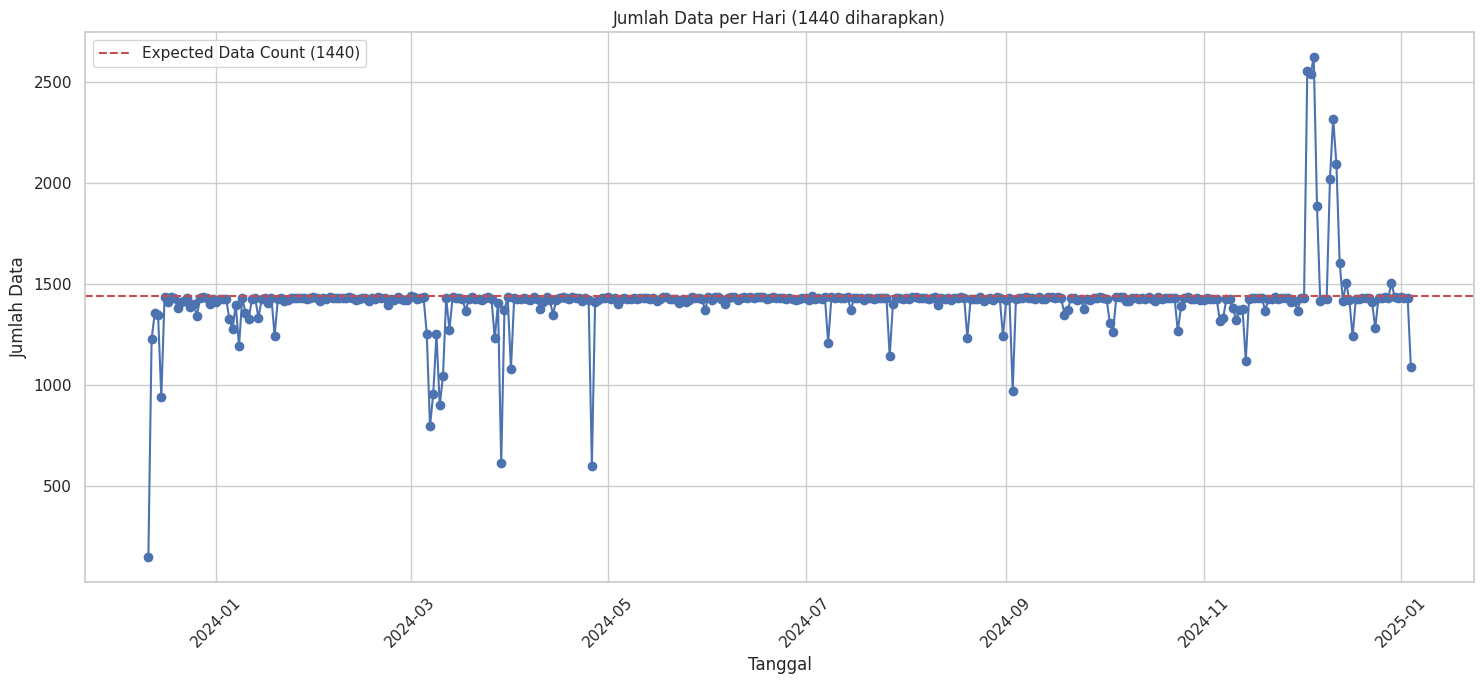

Hari dengan jumlah data yang kurang dari 1440:
           date  count
0    2023-12-11    148
1    2023-12-12   1226
2    2023-12-13   1357
3    2023-12-14   1343
4    2023-12-15    939
..          ...    ...
386  2024-12-31   1427
387  2025-01-01   1433
388  2025-01-02   1427
389  2025-01-03   1430
390  2025-01-04   1088

[391 rows x 2 columns]


In [11]:

# Mengelompokkan data berdasarkan hari
cuacaT['date'] = cuacaT['timestamp'].dt.date
data_per_day = cuacaT.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [12]:
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,date
1735995225,25.21129,97.6,1011.07,25.62,2025-01-04 19:53:45+07:00,4.08,2025-01-04
1735995285,25.24464,97.62,1011.1,25.65,2025-01-04 19:54:45+07:00,4.07,2025-01-04
1735995345,25.23675,97.69,1011.05,25.63,2025-01-04 19:55:45+07:00,4.08,2025-01-04
1735995405,25.23159,97.66,1011.08,25.63,2025-01-04 19:56:45+07:00,4.07,2025-01-04
1735995465,25.24156,97.66,1011.11,25.64,2025-01-04 19:57:45+07:00,4.08,2025-01-04
1735995525,25.22334,97.67,1011.11,25.62,2025-01-04 19:58:45+07:00,4.07,2025-01-04
1735995585,25.23847,97.7,1011.09,25.63,2025-01-04 19:59:45+07:00,4.08,2025-01-04
1735995645,25.21165,97.66,1011.12,25.61,2025-01-04 20:00:45+07:00,4.07,2025-01-04
1735995705,25.22712,97.75,1011.14,25.61,2025-01-04 20:01:45+07:00,4.07,2025-01-04
1735995766,25.26563,97.8,1011.09,25.64,2025-01-04 20:02:46+07:00,4.07,2025-01-04


In [13]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
cuacaT.to_csv(
#cuacaT.tail(43200).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [14]:
datacuaca = pd.read_csv("/work/cuaca.csv")

In [15]:
datacuaca

,dew,humidity,pressure,temperature,timestamp,volt,date
0,23.29000,89.28,1010.72,25.18,2023-12-11 19:13:51+07:00,4.08,2023-12-11
1,23.29000,89.38,1010.75,25.16,2023-12-11 19:14:51+07:00,4.08,2023-12-11
2,23.31000,89.58,1010.76,25.14,2023-12-11 19:15:51+07:00,4.08,2023-12-11
3,23.35000,89.86,1010.82,25.13,2023-12-11 19:16:51+07:00,4.08,2023-12-11
4,23.32000,89.85,1010.82,25.10,2023-12-11 19:17:51+07:00,4.08,2023-12-11
...,...,...,...,...,...,...,...
552018,25.22334,97.67,1011.11,25.62,2025-01-04 19:58:45+07:00,4.07,2025-01-04
552019,25.23847,97.70,1011.09,25.63,2025-01-04 19:59:45+07:00,4.08,2025-01-04
552020,25.21165,97.66,1011.12,25.61,2025-01-04 20:00:45+07:00,4.07,2025-01-04
552021,25.22712,97.75,1011.14,25.61,2025-01-04 20:01:45+07:00,4.07,2025-01-04


In [16]:
datacuaca.tail(360)

,dew,humidity,pressure,temperature,timestamp,volt,date
551663,27.40202,72.08,1009.21,33.11,2025-01-04 13:27:41+07:00,4.13,2025-01-04
551664,27.33985,72.02,1009.20,33.06,2025-01-04 13:28:41+07:00,4.13,2025-01-04
551665,26.80322,71.90,1009.23,32.53,2025-01-04 13:29:41+07:00,4.13,2025-01-04
551666,26.65922,72.84,1009.17,32.15,2025-01-04 13:30:41+07:00,4.13,2025-01-04
551667,26.64554,73.61,1009.17,31.95,2025-01-04 13:31:41+07:00,4.13,2025-01-04
...,...,...,...,...,...,...,...
552018,25.22334,97.67,1011.11,25.62,2025-01-04 19:58:45+07:00,4.07,2025-01-04
552019,25.23847,97.70,1011.09,25.63,2025-01-04 19:59:45+07:00,4.08,2025-01-04
552020,25.21165,97.66,1011.12,25.61,2025-01-04 20:00:45+07:00,4.07,2025-01-04
552021,25.22712,97.75,1011.14,25.61,2025-01-04 20:01:45+07:00,4.07,2025-01-04


In [17]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

# Menghapus data yang memiliki nilai kurang dari 0 pada kolom tertentu (misalnya suhu, kelembapan, tekanan, dll)
# Gantilah nama kolom sesuai dengan nama kolom pada DataFrame Anda
datacuaca = datacuaca[(datacuaca['temperature'] >= 10) & 
                      (datacuaca['humidity'] >= 0) & 
                      (datacuaca['pressure'] >= 1000) & 
                      (datacuaca['dew'] >= 10) &
                      (datacuaca['volt'] >= 0)]

# Tampilkan hasil
print(datacuaca.head())

     dew  humidity  pressure  temperature                 timestamp  volt  \
0  23.29     89.28   1010.72        25.18 2023-12-11 19:13:51+07:00  4.08   
1  23.29     89.38   1010.75        25.16 2023-12-11 19:14:51+07:00  4.08   
2  23.31     89.58   1010.76        25.14 2023-12-11 19:15:51+07:00  4.08   
3  23.35     89.86   1010.82        25.13 2023-12-11 19:16:51+07:00  4.08   
4  23.32     89.85   1010.82        25.10 2023-12-11 19:17:51+07:00  4.08   

         date  hour  minute  day  month  year  
0  2023-12-11    19      13   11     12  2023  
1  2023-12-11    19      14   11     12  2023  
2  2023-12-11    19      15   11     12  2023  
3  2023-12-11    19      16   11     12  2023  
4  2023-12-11    19      17   11     12  2023  


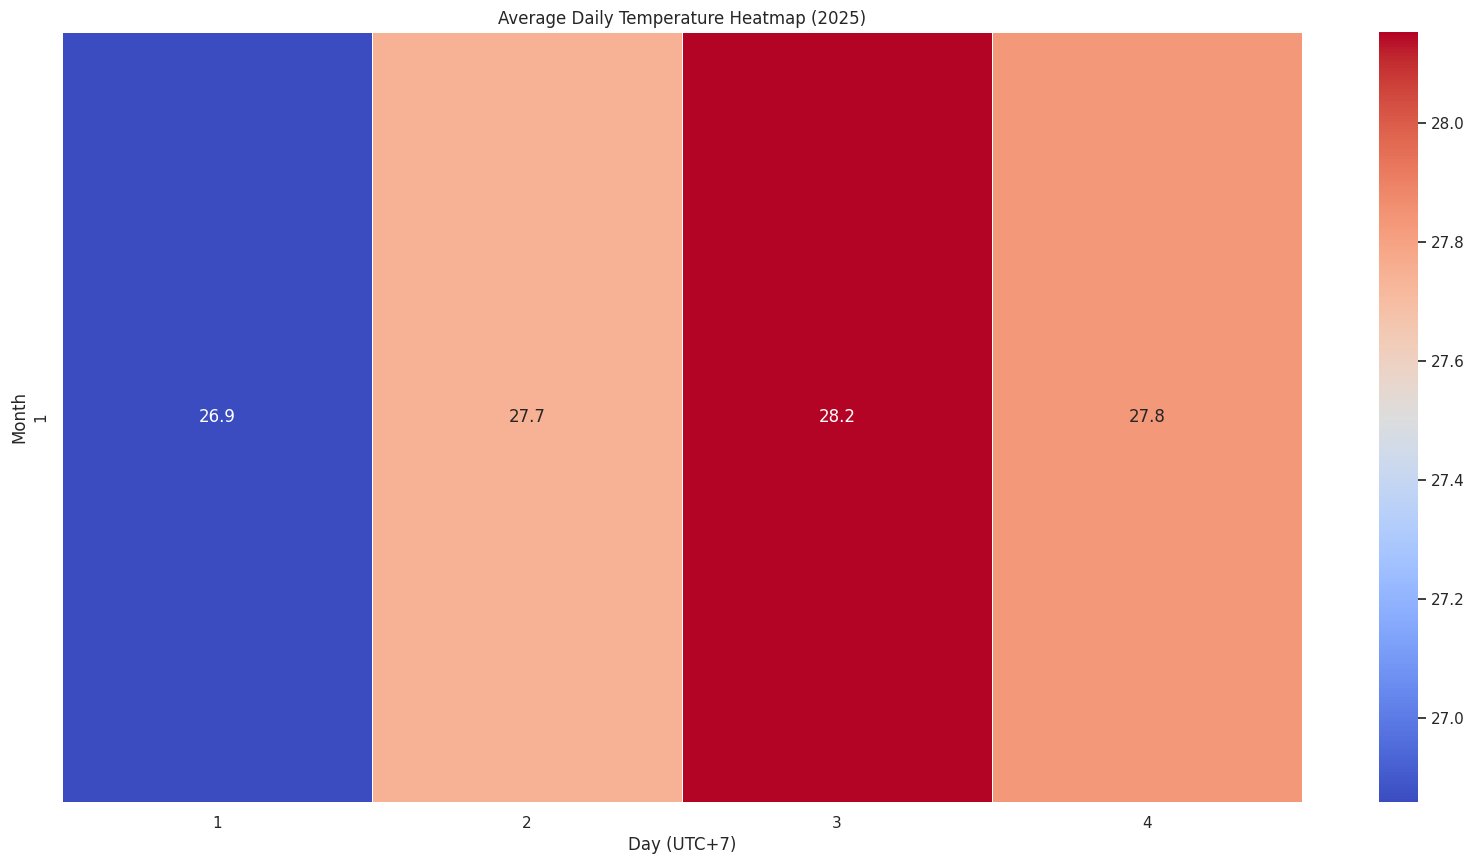

In [18]:
# Pilih tahun
selected_year = 2025
datacuaca_filtered = datacuaca[datacuaca['year'] == selected_year]

# Mengelompokkan data berdasarkan 'month' dan 'day', menghitung rata-rata suhu
datacuaca_grouped = datacuaca_filtered.groupby(['month', 'day']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap (sumbu X: hari, sumbu Y: bulan)
temperature_pivot = datacuaca_grouped.pivot(index='month', columns='day', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=0.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Day (UTC+7)')
ax.set_ylabel('Month')
ax.set_title(f'Average Daily Temperature Heatmap ({selected_year})')

# Menampilkan heatmap
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

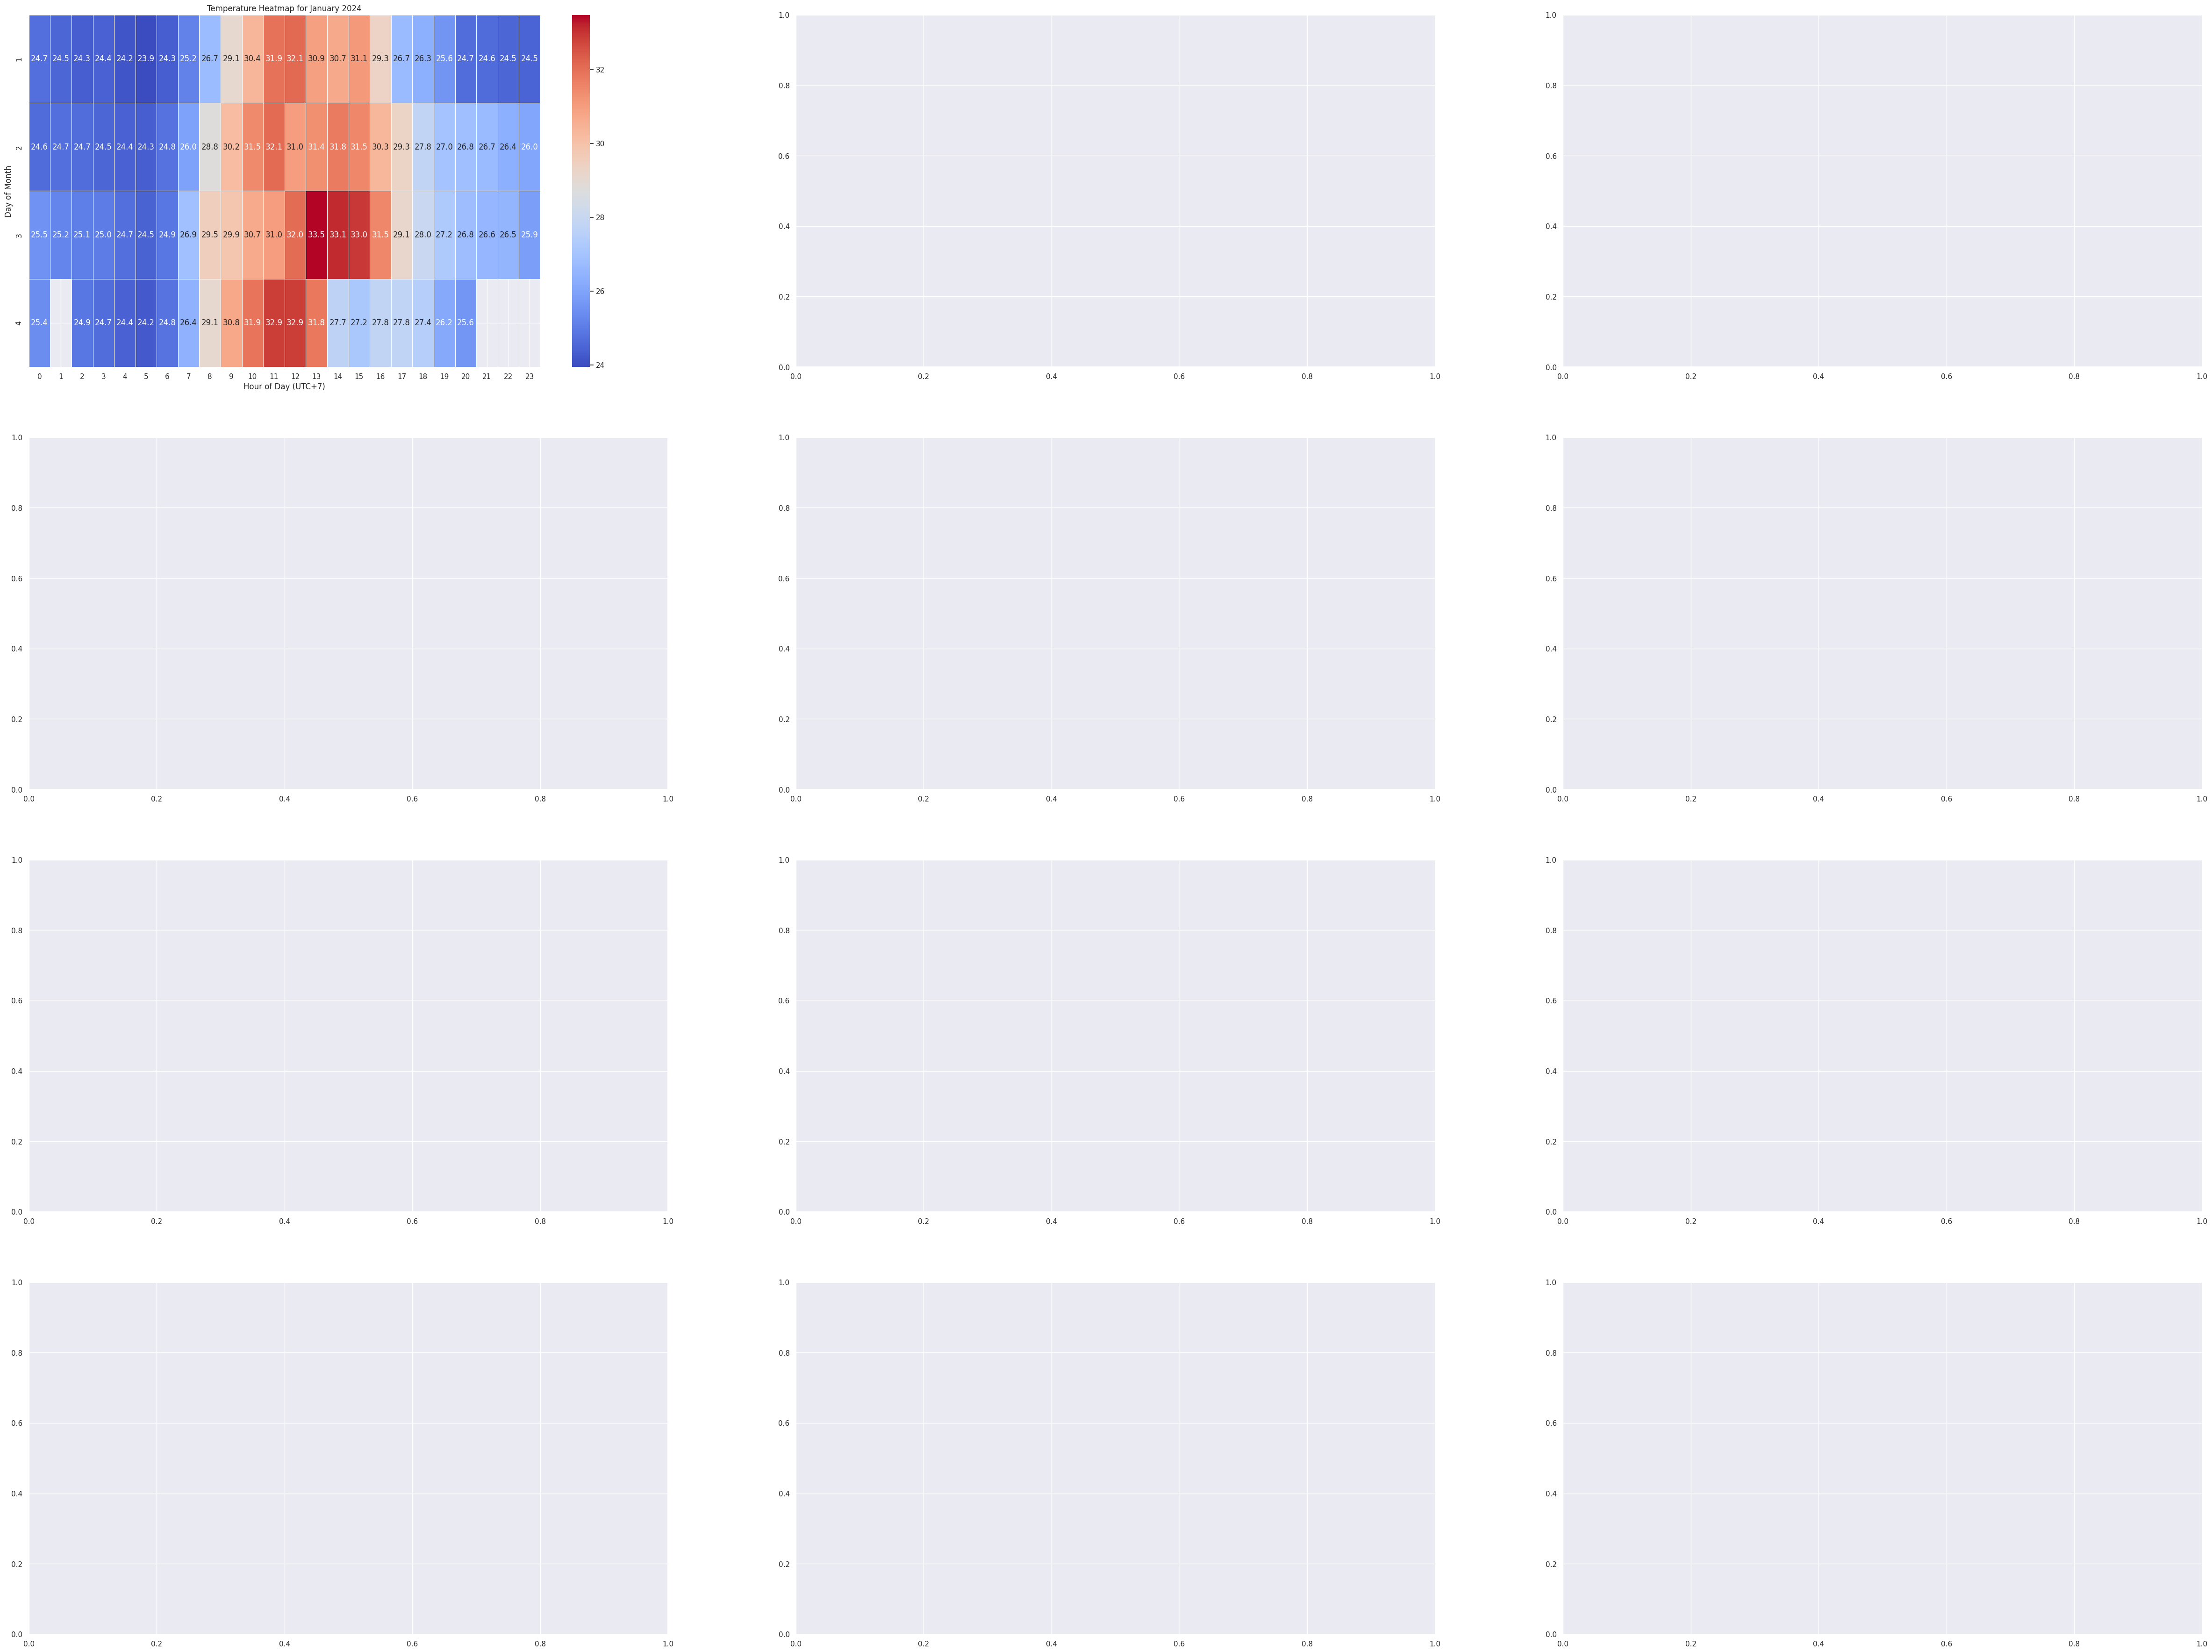

In [19]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']

# Menentukan rentang bulan dari Januari hingga Desember
months = range(1, 13)  # Bulan 1 hingga 12

# Mengatur ukuran grafik untuk menampung semua heatmap
fig, axs = plt.subplots(4, 3, figsize=(60, 45))
axs = axs.flatten()  # Meratakan array subplot untuk iterasi yang lebih mudah

# Looping untuk setiap bulan
for month in months:
    # Filter data untuk bulan tertentu
    monthly_data = datacuaca[(datacuaca['timestamp'].dt.year == 2025) & (datacuaca['timestamp'].dt.month == month)]

    # Mengurutkan data berdasarkan 'timestamp'
    monthly_data = monthly_data.sort_values(by='timestamp')

    # Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
    monthly_data['day'] = monthly_data['timestamp'].dt.day
    monthly_data['hour'] = monthly_data['timestamp'].dt.hour

    # Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
    datacuaca_grouped = monthly_data.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

    # Pivot dataframe untuk membuat format yang sesuai dengan heatmap
    temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

    # Membuat heatmap untuk bulan tersebut
    sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=0.5, ax=axs[month-1], cmap="coolwarm")
    
    # Memberi judul pada heatmap
    axs[month-1].set_title(f'Temperature Heatmap for {month_names[month-1]} 2024')
    axs[month-1].set_xlabel('Hour of Day (UTC+7)')
    axs[month-1].set_ylabel('Day of Month')

# Mengatur layout
plt.tight_layout()

# Menampilkan heatmaps
plt.savefig("Heatmap_month.jpg")
plt.show()



In [26]:
pilih_tahun = 2025
pilih_bulan = 1

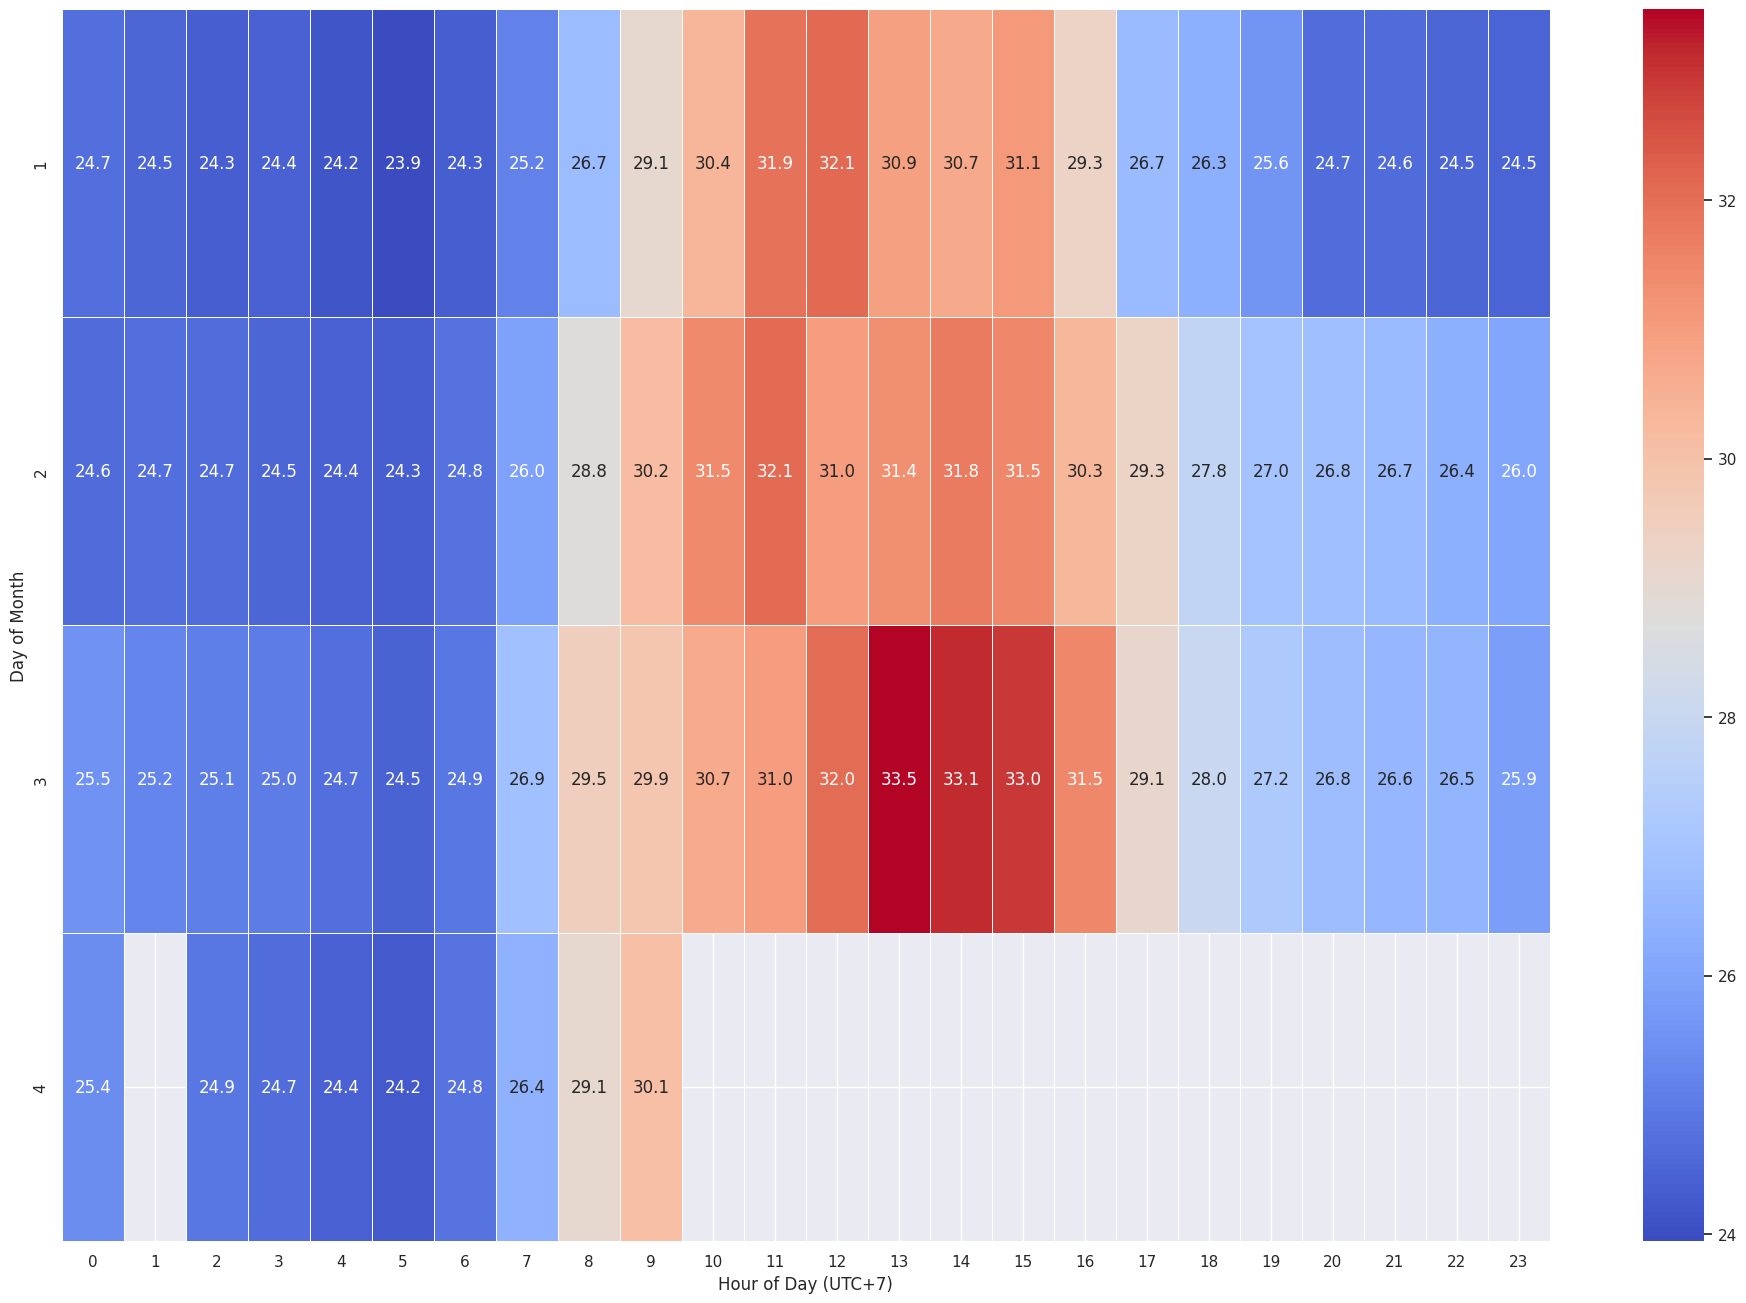

In [27]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.savefig("Temp_month.jpg")
plt.show()



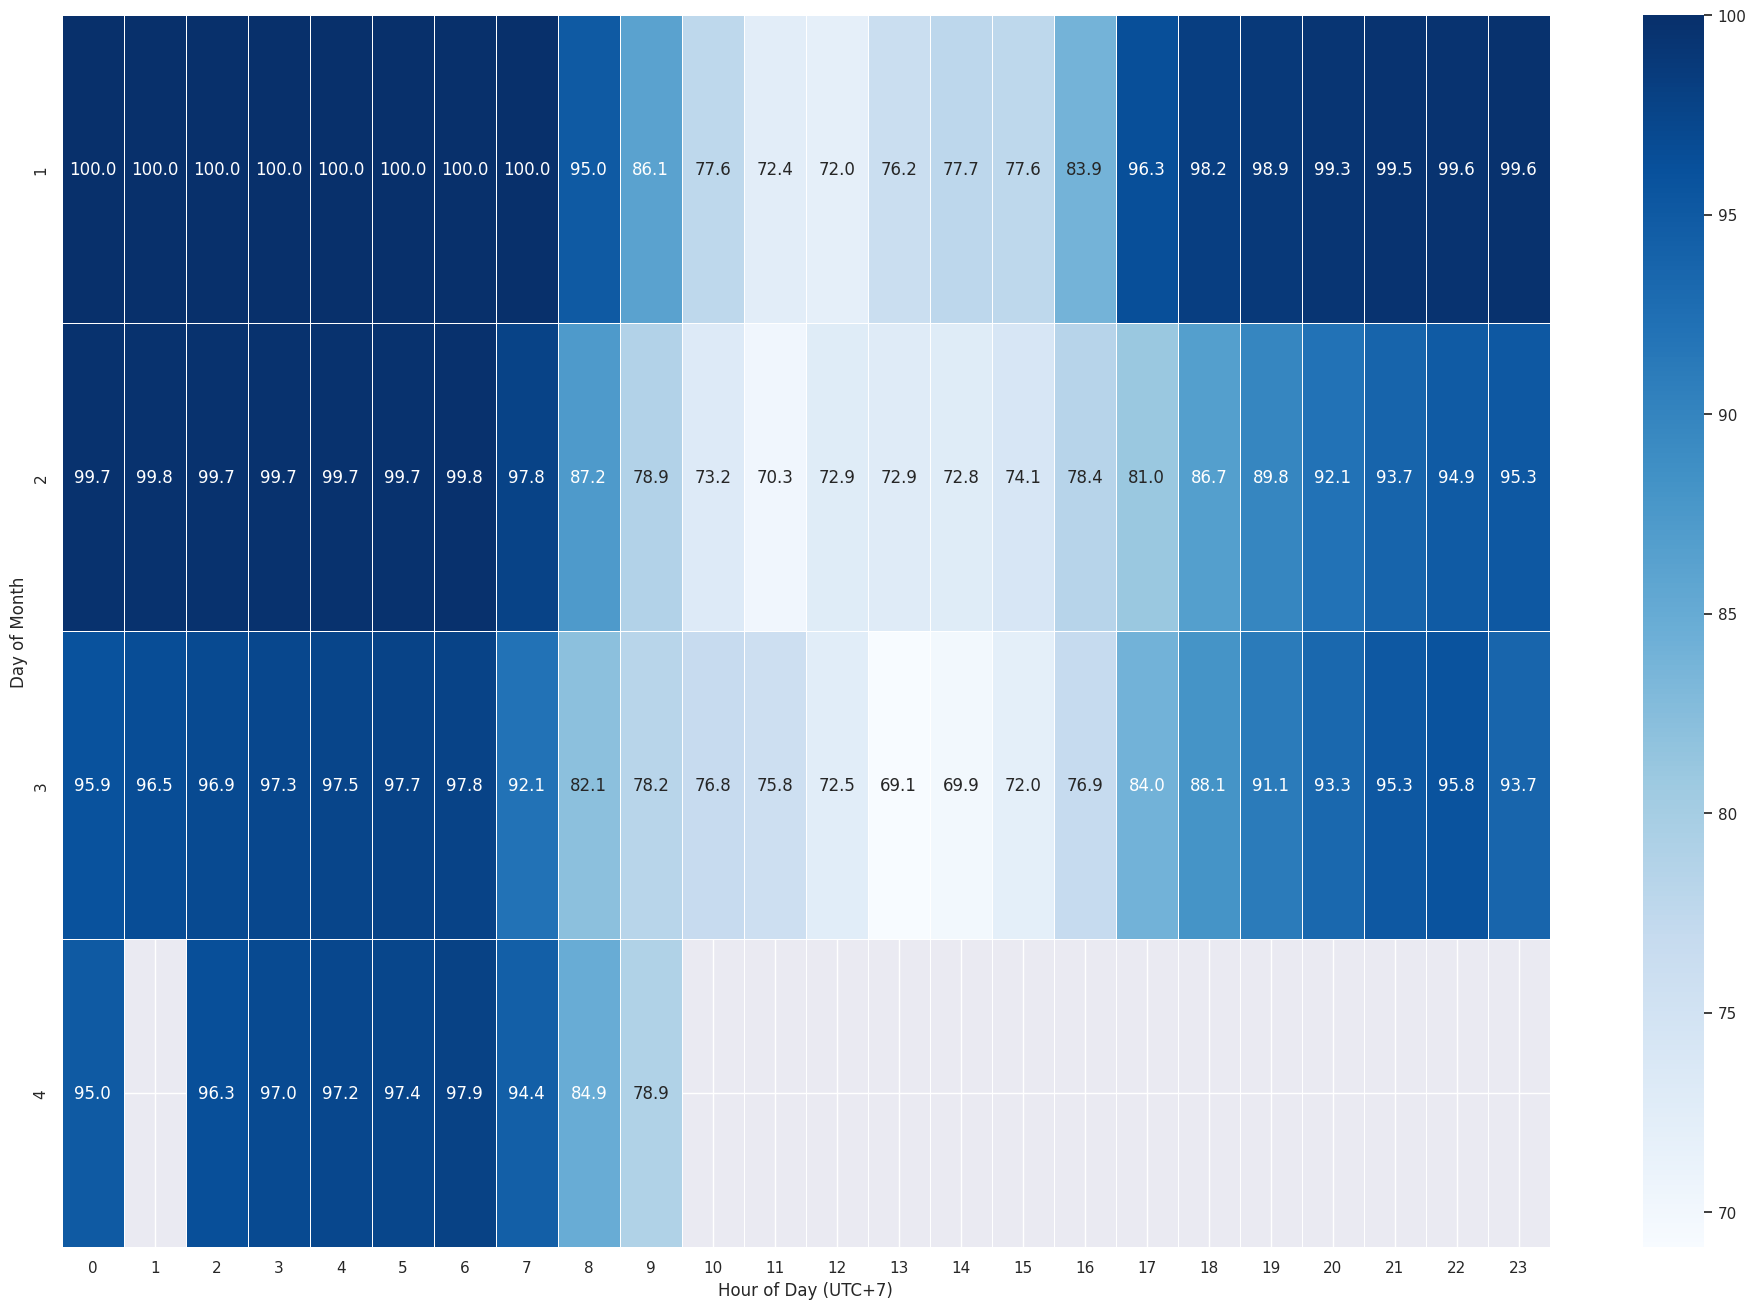

In [28]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'humidity': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
humidity_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='humidity')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(humidity_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()

Text(266.25, 0.5, 'Day of Month')

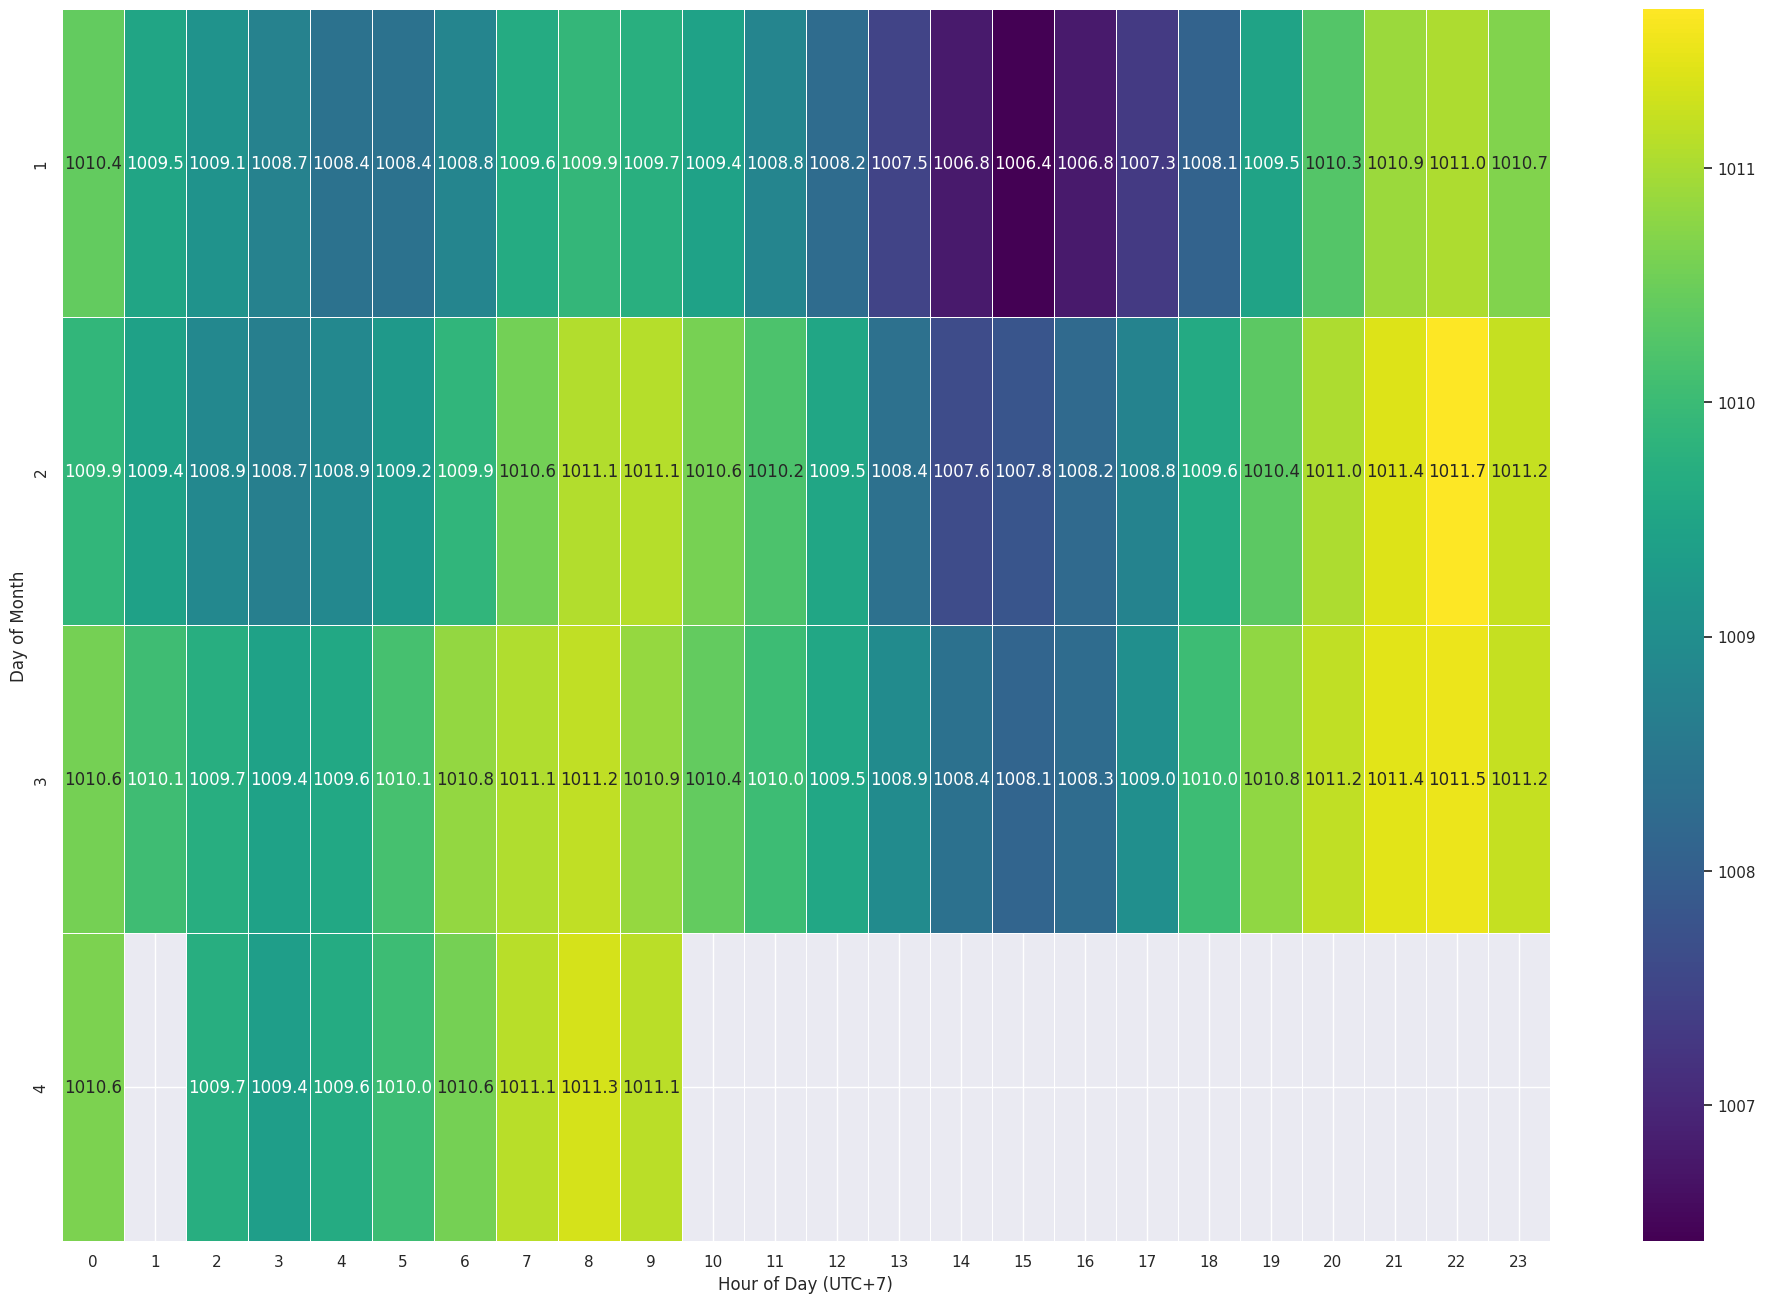

In [29]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'pressure': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
pressure_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='pressure')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(pressure_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="viridis")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

Text(266.25, 0.5, 'Day of Month')

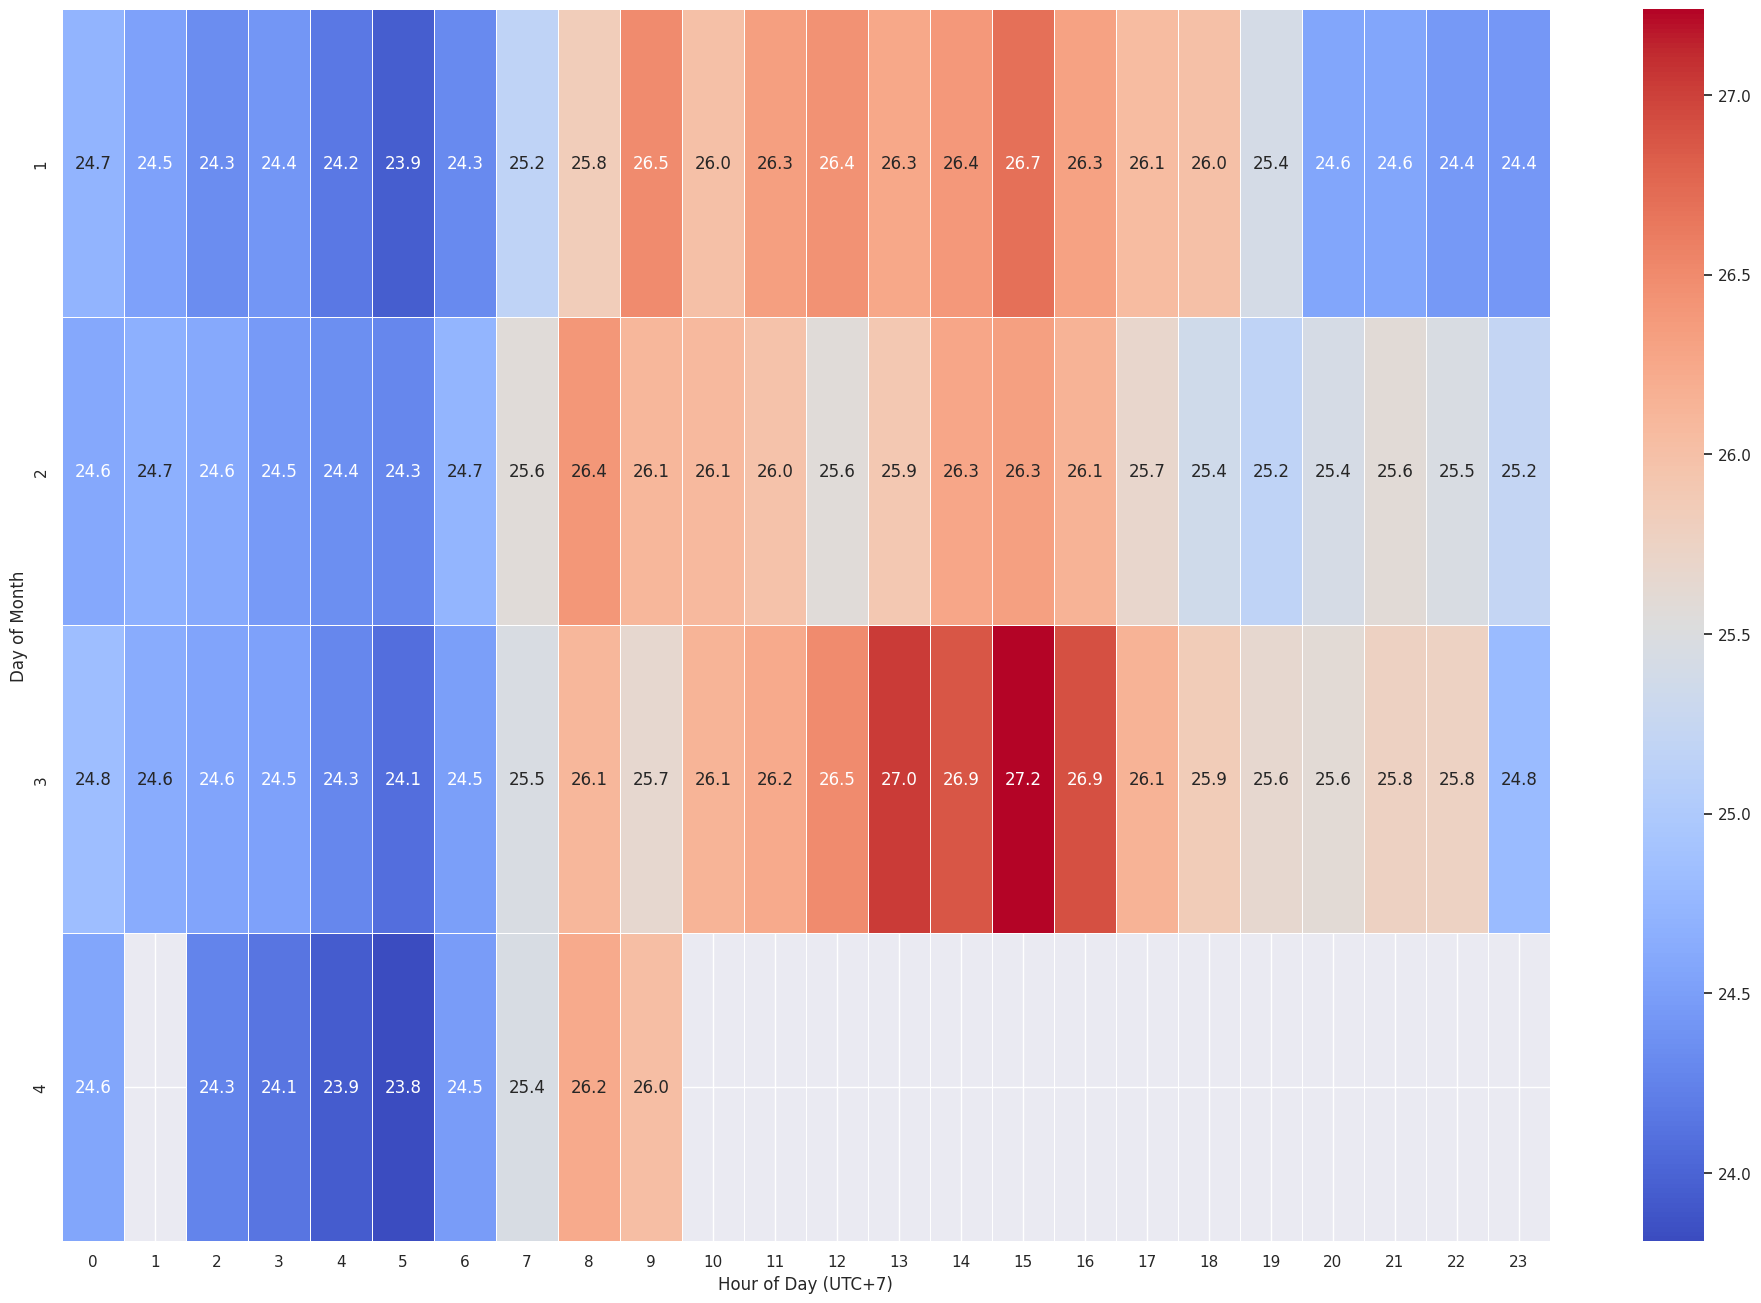

In [30]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'dew': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
dew_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='dew')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(dew_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>